In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
%matplotlib inline  

# A Data Riddle

The Riddler is a weekly column at [fivethirtyeight](https://fivethirtyeight.com/), where they offer puzzles on maths, logic and probability. These puzzles are often solved using data analysis approaches. 

The following puzzle could originally be found [here](https://fivethirtyeight.com/features/are-you-the-best-warlord/). The puzzle received submissions from around 1500 users, and their submissions are available [here](https://github.com/fivethirtyeight/data/blob/master/riddler-castles/castle-solutions-3.csv).

___
#### Are you The Best Warlord?

In a distant, war-torn land, there are two warlords: you and your archenemy.

In this land, there are ten castles. Each castle has its own strategic value for a would-be conqueror. Specifically, the castles are worth 1, 2, 3, …, 9, and 10 victory points (corresponding to the castle number).

You and your enemy each have 100 soldiers to distribute, any way you like, to fight at any of the ten castles. Whoever sends more soldiers to a given castle conquers that castle and wins its victory points. If you each send the same number of troops, you split the points. 

You don’t know what distribution of forces your enemy has chosen until the battles begin. Whoever wins the most points wins the war.
___

In the exercises for today you will be working with these submitted solutions to the puzzle, which can be found in `submissions.txt`.

The file has the following variables:

| Column index | Variable | Definition |
| -:- | :- | :- | 
| 0 | Castle 1 | The number of troops deployed to the castle |
| 1 | Castle 2 | The number of troops deployed to the castle |
| 2 | Castle 3 | The number of troops deployed to the castle |
| 3 | Castle 4 | The number of troops deployed to the castle |
| 4 | Castle 5 | The number of troops deployed to the castle |
| 5 | Castle 6 | The number of troops deployed to the castle |
| 6 | Castle 7 | The number of troops deployed to the castle |
| 7 | Castle 8 | The number of troops deployed to the castle |
| 8 | Castle 9 | The number of troops deployed to the castle |
| 9 | Castle 10 | The number of troops deployed to the castle |
| 10 | Why did you choose your troop deployment? | String containing the reasoning behind the submission |


## 13.0 Load the data and convert it to a numpy array
Inspect the `submissions.txt` file and read through the provided function below to understand what each line does

Once you've done that, apply the function to the `submissions.txt` file and convert the resulting data structure into a numpy array which you will use for the rest of the exercises.

In [4]:
def read_csv(filepath):
    output = []
    regex = "^\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+"
    with open(filepath, "r", errors="replace") as file:
        lines = file.readlines()
    for line in lines:
        regex_find = re.search(regex,line)
        if regex_find:
            line = regex_find.group() 
            line = line.split(",") 
            line = [int(value) for value in line]
            output.append(line)
    return output

In [5]:
data = read_csv('submissions.txt')
data = np.array(data)

#### 13.1
Extract the rows where the sum of the row is 100.


There are `140` rows where the sum is not equal to 100 so the final shape of the array should be `(1321,10)` after extracting the rows where the sum is 100.




In [6]:
data = data[np.sum(data,axis=1) == 100]
print(np.array(data))

[[ 2  2  2 ... 28 36  2]
 [ 1  1  1 ...  1  1  1]
 [ 2  3  4 ... 22 22  8]
 ...
 [ 0  1  2 ...  1 32 22]
 [ 0  0  3 ... 21  4 31]
 [ 1  0  0 ... 27 29 33]]


In [7]:
newdata = []
for i in data:
    if(sum(i) == 100):
        newdata.append(i)
       
print(np.array(newdata))

[[ 2  2  2 ... 28 36  2]
 [ 1  1  1 ...  1  1  1]
 [ 2  3  4 ... 22 22  8]
 ...
 [ 0  1  2 ...  1 32 22]
 [ 0  0  3 ... 21  4 31]
 [ 1  0  0 ... 27 29 33]]


In [8]:
data.shape

(1321, 10)

## 13.2. Find the mean and standard deviation of each castle's number of deployed troops
Hint: Check the jupyter notebook from today's lecture.

For each castle, fit the distribution as a normal distribution (using `stats.norm.fit`) and obtain its mean, `mu`, and standard deviation, `sigma`. 

For `Castle 1`, at column 0, you should get mu `2.025` and sigma `3.875`.

In [10]:
rawdata = stats.norm.fit(data[:,0])
cleaneddata = stats.norm.fit(data[:,0])

#### 13.3
For the castle with the highest mean value, plot the histogram and the corresponding normal distribution obtained using `stats.norm.fit`.

Hint: Check the lecture jupyter notebook



[1.9386828160484482, 2.659348978046934, 4.05450416351249, 6.9182437547312645, 9.168811506434519, 12.009084027252081, 13.500378501135504, 16.89023467070401, 17.3111279333838, 15.549583648750946]
8


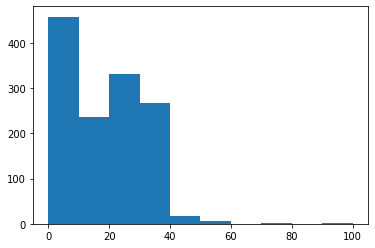

In [11]:
means = []
means2 = []
for i in range(10): #10 castles
    means.append(sum(data[:,i])/len(data[:,i]))
    means2.append(stats.norm.fit(data[:,i])[0])
print(means)
#print(means2)
plt.hist(data[:,8])
print(means.index(max(means)))


#### 13.4

For the castle with the lowest standard deviation value,  plot the histogram and the corresponding normal distribution obtained using `stats.norm.fit`.

Hint: Check the lecture jupyter notebook


1


[3.7038385992768035,
 2.969528192097987,
 3.88849851052227,
 5.775851627058807,
 7.168109786141741,
 8.191772750517364,
 9.665967276972726,
 10.730653384085983,
 12.827426332981574,
 13.387968495341385]

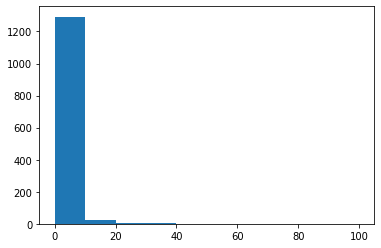

In [12]:
standarddeviation = []
for i in range(10): #10 castles
    standarddeviation.append(stats.norm.fit(data[:,i])[1])
plt.hist(data[:,0])
print(standarddeviation.index(min(standarddeviation)))

standarddeviation


#### 13.5
For the castle with the highest standard deviation value,  plot the histogram and the corresponding normal distribution obtained using `stats.norm.fit`.

Hint: Check the lecture jupyter notebook


9


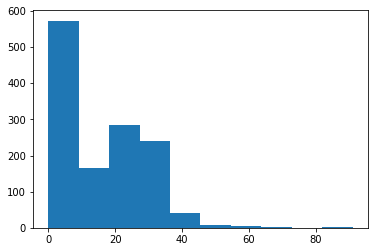

In [13]:
plt.hist(data[:,9])
print(standarddeviation.index(max(standarddeviation)))

#### 13.6

Plot the Q-Q plots and verify, and if the above data distributions are good fits as normal distribution 

Hint: Check the lecture jupyter notebook


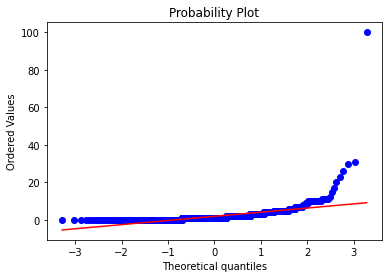

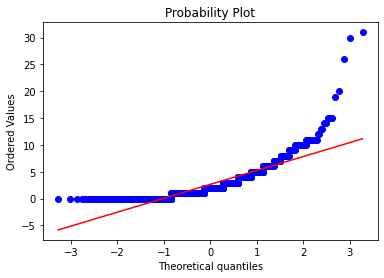

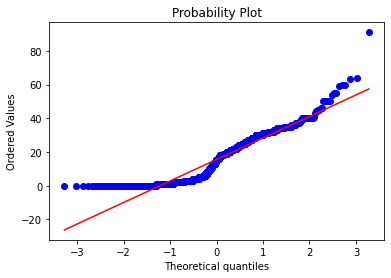

In [14]:
import statsmodels.api as sm 
import pylab as py

#sm.qqplot(data[:,0]) 
#sm.qqplot(data[:,1]) 
#sm.qqplot(data[:,9]) 
stats.probplot(data[:,0], plot=plt)
plt.show()
stats.probplot(data[:,1], plot=plt)
plt.show()
stats.probplot(data[:,9], plot=plt)
py.show()

#### 13.7 
Find the mode(s) and median for each of the castle

Hint: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

Hint 2: https://numpy.org/doc/stable/reference/generated/numpy.median.html


In [15]:
print(stats.mode(data))
print(np.median(data, axis=0))

ModeResult(mode=array([[ 1,  1,  1,  1,  0,  0,  0, 15,  0,  0]]), count=array([[476, 328, 225, 160, 137, 115, 122,  82,  93, 128]]))
[ 1.  2.  3.  6.  9. 12. 14. 18. 18. 15.]


#### 13.8
For each submission (a row), compare it with every other row and calculate (roughly $1500 \times 1500$ comparisons) the score for each player in each of the comparison

In [16]:
score = np.zeros((len(data),(len(data))))
for i, row in enumerate(data):
    for j, row2 in enumerate(data.copy()): # dont think it is necessary to copy but did it just in case
        scorei = 0
        scorej = 0
        for k in range(10):
            if row[k] > row2[k]:
                scorei += k
            elif row[k] == row2[k]:
                scorei += k/2
                scorej += k/2
            else:
                scorej += k
        score[i,j] = scorei # don't need to add scorej since it is calculated again later and added as scorei


 #### 13.9
 
 Calculate the number of wins, losses and ties for each of the submissions.

In [18]:

score

array([[22.5, 27. , 17. , ..., 22. , 21. , 30. ],
       [18. , 22.5, 18. , ..., 15. , 19. , 21. ],
       [28. , 27. , 22.5, ..., 21. , 26. , 15. ],
       ...,
       [23. , 30. , 24. , ..., 22.5, 16. , 23. ],
       [24. , 26. , 19. , ..., 29. , 22.5, 20.5],
       [15. , 24. , 30. , ..., 22. , 24.5, 22.5]])

In [22]:
results = []
for i, row in enumerate(score):
    result = [0,0,0] # wins, draws, losses
    for j, res in enumerate(row):
        if res > score[j,i]:
            result[0] += 1
        elif res < score[j,i]:
            result[2] += 1
        else:
            result[1] += 1
    results.append(result)
results=np.array(results)

In [23]:
score

array([[22.5, 27. , 17. , ..., 22. , 21. , 30. ],
       [18. , 22.5, 18. , ..., 15. , 19. , 21. ],
       [28. , 27. , 22.5, ..., 21. , 26. , 15. ],
       ...,
       [23. , 30. , 24. , ..., 22.5, 16. , 23. ],
       [24. , 26. , 19. , ..., 29. , 22.5, 20.5],
       [15. , 24. , 30. , ..., 22. , 24.5, 22.5]])

#### 13.10
Plot the histogram based on the number of wins per submission

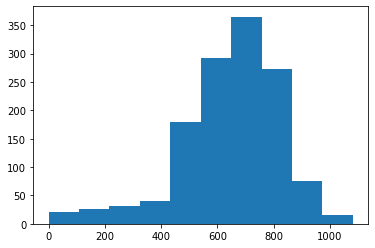

In [123]:
plt.hist(results[:,0])
print()

#### 13.11

Plot the histogram based on the number of losses per submission


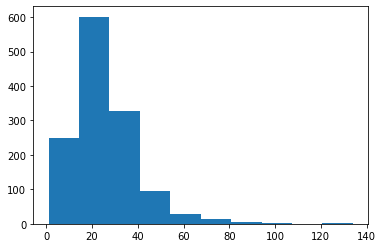

In [124]:
plt.hist(results[:,2])
print()

#### 13.12
Check if the distributions in exercise 13.10 or 13.11 follows a normal distribution

Hint: plot a QQ plot (check the lecture notebook)

In [ ]:
see 13.6

#### 13.13

Find top 5 submissions based on their number of wins.

In [12]:
# This returns the indices that would sort the list. Use them to index into the data to find the submission

(results).argsort(axis=0)[-5:,:]


array([[ 470,  101,  363],
       [1222, 1291,  112],
       [ 178,   19,  122],
       [ 805,  434,  647],
       [ 609, 1282, 1175]])

NOTE: I think the rest of the exercises should be bonus or removed

- Consider the discrete data distrubtions (column vector for each castle) and the corresponding normal distribution obtained using `stats.norm.fit`
- Consider the submission with the highest number of wins
- FOr each entry in the submission, calcualte its probability from the corresponding discrete data distribution
- For each entry in the submission, calculatte its  probability from the corresponding normal distribution, obtained using `stats.norm.fit`
- For each entry, calculate the differences of the corresponding probabilities (data distribution and the normal distribution obtained) for each castle.



- You are required to generatet 2000 different submissions, one each for a minion, where each submission is a vector of 10 integers, randomly sampled from a normal distribution.

    - In reality, it is not possible to generate vectors as decribe in the question above. Could you reason why?

### Detour from warlords: Being both rounded and normal.

- Sample 100000 entries from a normal distribution.
- Round off each draw to the nearest integer.
- Check if the resulting disttribution is also normal
